## From https://github.com/TrentBrick/NeurogenesisModel: "First, create a folder ‘dataset_mnist’ containing ‘mnist144.mat’, a file which contains 12x12 downsampled images from the original 28x28 images by applying a 2x2 mean kernel over all pixels except the two pixels on the borders."

In [50]:
# code for the neurogenesis matlab work!

import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, norm
from scipy.sparse import csc_matrix, coo_matrix, csr_matrix
import pandas as pd
import time
import copy

In [51]:
# https://github.com/hsjeong5/MNIST-for-Numpy/blob/master/mnist.py

file = 'data/MNIST/raw/train-images-idx3-ubyte'
with open(file, 'rb') as f:
    mnist = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1,28,28)

In [52]:

file = 'data/MNIST/raw/train-labels-idx1-ubyte'
with open(file, 'rb') as f:
    labels = np.frombuffer(f.read(), np.uint8, offset=8).reshape(-1)
labels.shape

(60000,)

In [53]:
mnist.shape

(60000, 28, 28)

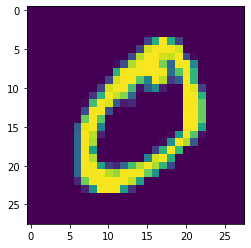

In [54]:
plt.imshow(mnist[1])

In [55]:
# downsampling here!!

kernel = torch.nn.AvgPool2d(2, stride=None, padding=-2, 
                   ceil_mode=False, count_include_pad=True, 
                   divisor_override=None)
k_m = kernel(torch.Tensor(mnist))
k_m.shape

torch.Size([60000, 12, 12])

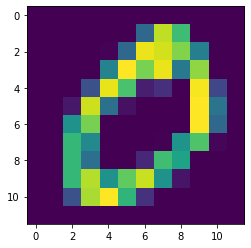

In [56]:
plt.imshow(k_m[1])

In [57]:
labels[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [58]:
k_m = k_m.reshape(k_m.shape[0],-1).T.detach().numpy()
k_m.shape

(144, 60000)

In [ ]:
# save out for matlab
from scipy.io import savemat
mdict = {'trainingimages':k_m, 'traininglabels':labels}
savemat("../NeurogenesisModel/dataset_mnist/mnist144.mat", mdict)

In [59]:
# save out for python
import pickle

pickle.dump((k_m.T, labels),open("data/kernelized_mnist_train.pickle", "wb"))